In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from scipy.io import wavfile

In [3]:
sr, data = wavfile.read('data/LJSpeech-1.1/wavs/LJ001-0001.wav')

In [19]:
import numpy as np
mel = np.load('mels/ljspeech-mel-00001.npy')
print(mel.shape)

(832, 80)


1. F0

In [17]:
import librosa
from tts.audio import hparams_audio

f0 = librosa.yin(data, fmin=65, fmax=2093, sr=hparams_audio.sampling_rate, win_length=hparams_audio.win_length, hop_length=hparams_audio.hop_length)

In [18]:
print(len(f0))

832


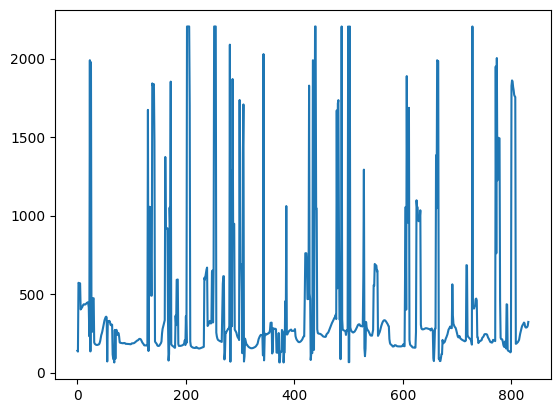

In [15]:
import matplotlib.pyplot as plt

plt.plot(f0)

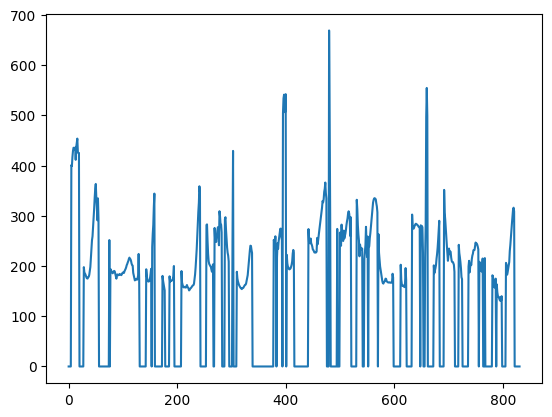

In [25]:
import pyworld as pw

_f0, t = pw.dio(data, sr, frame_period=hparams_audio.hop_length * 1000 / hparams_audio.sampling_rate)    # raw pitch extractor
f0 = pw.stonemask(data, _f0, t, sr)  # pitch refinement
plt.plot(f0)

In [26]:
f0.shape

(832,)

2. Energy

In [68]:
from scipy.signal import stft
import torch

e = torch.stft(
    torch.tensor(data), 
    n_fft=1024,
    win_length=1024,
    hop_length=hparams_audio.hop_length,
    return_complex=True
)
print(e.size())
e = e.abs()
e = torch.norm(e, 2, dim=0)
print(e.size())

torch.Size([513, 832])
torch.Size([832])


In [73]:
import glob

wav_list = glob.glob('data/LJSpeech-1.1/wavs/**.wav')
wav_list.sort()

In [81]:
torch.linspace(1, 6, 5)[1:-1]

tensor([2.2500, 3.5000, 4.7500])

In [80]:
boundaries = torch.tensor([1, 3, 5, 7, 9])
a = torch.tensor([9])
torch.bucketize(a, boundaries)

tensor([5])

In [74]:
wav_list

['data/LJSpeech-1.1/wavs/LJ001-0001.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0002.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0003.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0004.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0005.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0006.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0007.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0008.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0009.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0010.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0011.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0012.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0013.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0014.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0015.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0016.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0017.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0018.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0019.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0020.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0021.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0022.wav',
 'data/LJSpeech-1.1/wavs/LJ001-0023.wav',
 'data/LJSpeech-1.1/wavs/LJ001-002